In [167]:
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [168]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [169]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [170]:
X_train.shape

(60000, 28, 28)

In [171]:
X_train[0].shape

(28, 28)

In [172]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**Data:** <br>

The data here is not in the picture form. Rather it is in the form of pixels. 


**Shape of X_train:** <br>

The shape of X_train is quite different in this case. It is basically a 3D array. Where 60000 are the number of images (rows) and 28 by 28 is the numpy array for a single image. 
<br>


Check: 

1. X_train[0].shape
2. X_train[0]

In [173]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

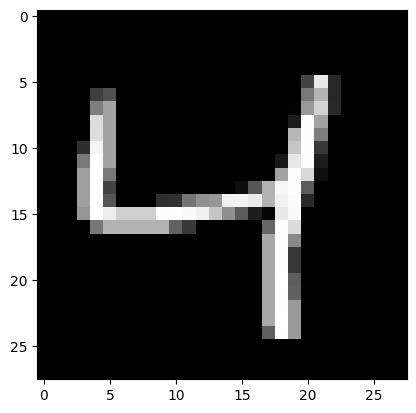

In [174]:
mono = plt.cm.gray
plt.imshow(X_train[2], cmap=mono)

In [175]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**Observation**

The data tells us that it is not in a specific confined range. Well, it ranges from 0 to 255. However, they are not within a similar range. The more similar they are, the better the weights. Convergence becomes faster. To bring all the values into a similar range, divide them by 255. 

In [176]:
X_train = X_train / 255
X_test = X_test / 255

In [177]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [178]:
X_train.shape

(60000, 28, 28)

In [179]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [180]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [181]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [182]:
history = model.fit(X_train, y_train, epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2839 - accuracy: 0.9193 - val_loss: 0.1608 - val_accuracy: 0.9515
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1279 - accuracy: 0.9626 - val_loss: 0.1166 - val_accuracy: 0.9651
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0880 - accuracy: 0.9740 - val_loss: 0.0993 - val_accuracy: 0.9698
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0654 - accuracy: 0.9804 - val_loss: 0.0919 - val_accuracy: 0.9725
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0486 - accuracy: 0.9856 - val_loss: 0.0945 - val_accuracy: 0.9731
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0383 - accuracy: 0.9885 - val_loss: 0.0822 - val_accuracy: 0.9771
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0295 - accuracy: 0.9911 - val_loss: 0.0818 - val_accuracy:

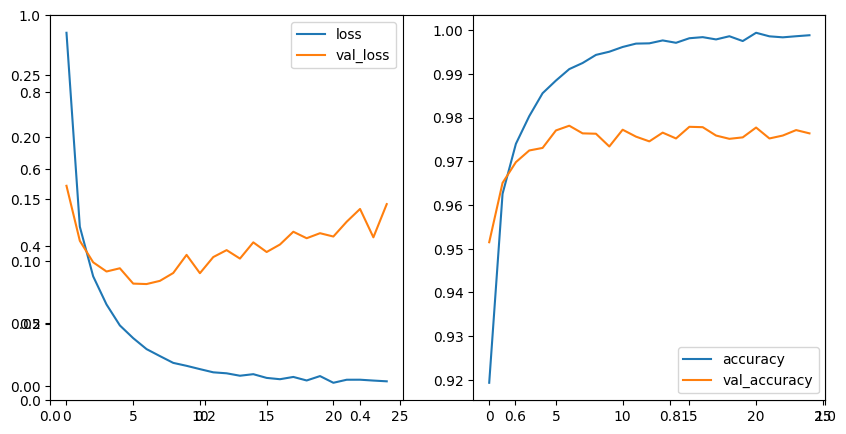

In [183]:
figure = plt.subplots(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

In [185]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [193]:
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

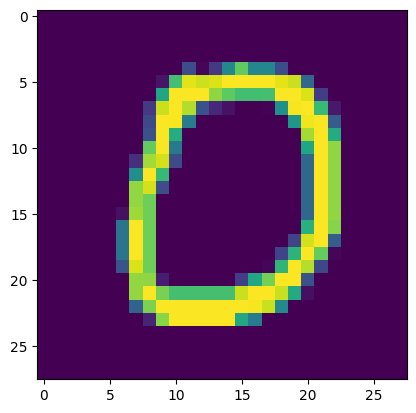

In [216]:
plt.imshow(X_test[10])

In [214]:
model.predict(X_test[10].reshape(1, 28, 28)).argmax(axis=1)

1/1 [==============================] - 0s 18ms/step


array([0])

In [189]:
y_pred = y_prob.argmax(axis=1)

In [197]:
accuracy_score(y_test, y_pred)

0.9766

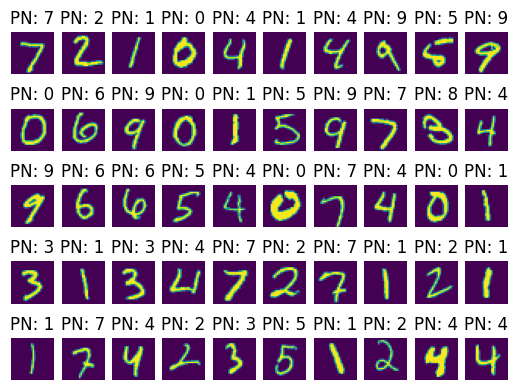

In [218]:
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_test[i])
    plt.title(f"PN: {y_pred[i]}")
    plt.axis("off")